In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier



In [30]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [31]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.drop(['customerID'], axis=1, inplace=True)

In [32]:
label_encoder = LabelEncoder()

for column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])
        
        #Using label encoder to convert all the columns to numerical values for further analysis and predictions



In [33]:
X= df.drop(['Churn'], axis=1)
y = df['Churn']
#Defining the dependent and independent variables

In [34]:
X = X[['MonthlyCharges', 'TotalCharges', 'tenure', 'Contract']]
#Selecting the top 4 features for the prediction

In [35]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Splitting the data into training and testing data

In [36]:

adaboost = AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy)




Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Users\Krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200}
Accuracy: 0.7984386089425124


Confusion Matrix:
 [[946  90]
 [194 179]]


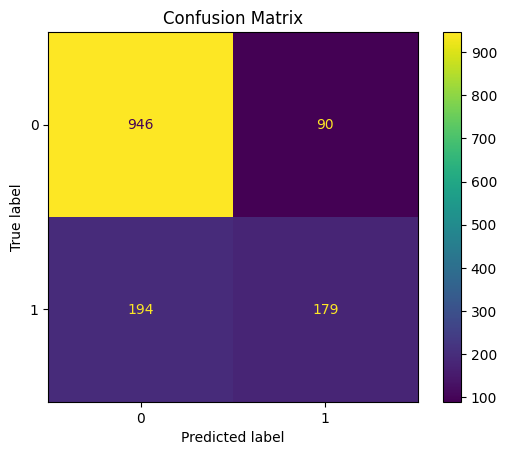

In [37]:

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title('Confusion Matrix')
plt.show()